# Simple linear regression model using Tensorflow with low level API.

# 0 - IMPORTS

In [34]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 

%matplotlib inline
warnings.filterwarnings('ignore')

# 1 - DATA LOAD

In [8]:
df1 = pd.read_csv('data\house_prices.csv')
df_shape = df1.shape 
print('Rows: {}\nCols: {}'.format(df_shape[0], df_shape[1]))
df1.head()

Rows: 21613
Cols: 21


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 2 - CREATE X, y VARIABLES

In [68]:
X = df1.iloc[:, 5].values # create numpy array variable
X = X.reshape(-1, 1) # transform to matrix 

In [69]:
y = df1.iloc[:, 2:3].values # create matrix variable, same as reshape(-1, 1)

# 3 - DATA TRANSFORMATION

In [70]:
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

# 4 - DATA VISUALIZATION

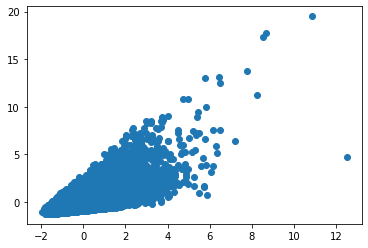

In [71]:
plt.scatter(X, y)

# 4 - LINEAR REGRESSION MODEL

### Simple Linear Regression Formula

### y = b0 + b1 * x

## 4.1 - Initialize b0 and b1 variables

In [72]:
np.random.seed(0)
np.random.rand(2)

array([0.5488135 , 0.71518937])

In [73]:
# Initialize variables b0 and b1

b0 = tf.Variable(0.5488135)
b1 = tf.Variable(0.71518937)

## 4.2 - Create placeholders

In [74]:
batch_size = 32
xph = tf.placeholder(tf.float32, [batch_size, 1])
yph = tf.placeholder(tf.float32, [batch_size, 1])

In [75]:
y_model = b0 + b1 * xph

In [76]:
erro        = tf.losses.mean_squared_error( yph, y_model )
otimizador  = tf.train.GradientDescentOptimizer( learning_rate = 0.001 )
treinamento = otimizador.minimize(erro)
init        = tf.global_variables_initializer()

In [77]:
# training model
with tf.Session() as sess:
    sess.run(init)
    #print(sess.run(b0))
    #print(sess.run(b1))
    # epochs
    for i in range(10000):
        idx = np.random.randint( len(X), size = batch_size ) # random index selection
        
        # feed placeholders
        feed = { xph: X[idx], yph: y[idx] }
        sess.run( treinamento, feed_dict = feed )
    b0_final, b1_final = sess.run([b0, b1])
b0_final, b1_final

(0.0005603798, 0.71900433)

In [78]:
previsoes = b0_final + b1_final * X

In [79]:
type(previsoes)

numpy.ndarray

In [80]:
y_inv = scaler_y.inverse_transform(y)
y_inv

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [81]:
previsoes_inv = scaler_y.inverse_transform(previsoes)
previsoes_inv

array([[281656.67602143],
       [681151.95523403],
       [163819.9389875 ],
       ...,
       [235671.60791063],
       [402367.47981229],
       [235671.60791063]])

In [82]:
mae = mean_absolute_error(y_inv, previsoes_inv)
std = abs(y_inv - previsoes_inv).std()
mse = mean_squared_error(y_inv, previsoes_inv)

print(mae, std, mse)

174784.40107403457 194526.48136283772 68390138810.21542


# 4 - MODEL REGRESSION VIEW

Text(0, 0.5, 'Cost')

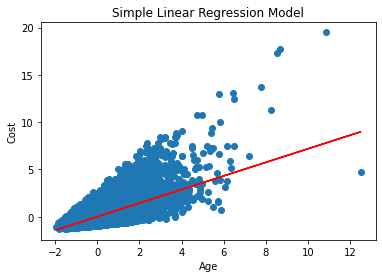

In [83]:
plt.plot(X, y, 'o')
plt.plot(X, previsoes, color = 'red')
plt.title('Simple Linear Regression Model')
plt.xlabel('Age')
plt.ylabel('Cost')